In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score,calinski_harabaz_score
from sklearn import preprocessing
from sklearn.cluster import KMeans
df = pd.read_csv(r'E:\BaiduDownload\统计分析-数据代码\统计分析\聚类分析\RFM.csv',engine='python')
df.head()

,user_id,R_days,F_times,M_money
0,1763,1,22,25900
1,1803,38,12,12290
2,2330,5,34,49514
3,3641,85,2,4419
4,3956,86,2,3368


C:\Users\daxuan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\daxuan\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


n_cluster: 2 score: 0.5583251885450722
n_cluster: 3 score: 0.553038285628917
n_cluster: 4 score: 0.5056415408712496
n_cluster: 5 score: 0.5096486423095071
n_cluster: 6 score: 0.514306114078716
n_cluster: 7 score: 0.4708153118464607
n_cluster: 8 score: 0.44968075584828787
n_cluster: 9 score: 0.4422019465181188


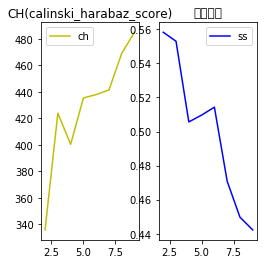

In [12]:
x=df.iloc[:,1:]
standard_model =preprocessing.StandardScaler()
data = standard_model.fit_transform(x)
ch_score = []
ss_score = []
for i in np.arange(2,10):
    model=KMeans(n_clusters=i,max_iter=1000)
    model.fit(data)
    score=silhouette_score(data,model.labels_)
    ch = calinski_harabaz_score(data,model.labels_)
    ss_score.append(score)
    ch_score.append(ch)
    print('n_cluster:',i,'score:',score)
fig = plt.figure()
ax1 = fig.add_subplot(131)
plt.plot(list(range(2,10)),ch_score,label='ch',c='y')
plt.title('CH(calinski_harabaz_score)')
plt.legend()

ax2 = fig.add_subplot(132)
plt.plot(list(range(2,10)),ss_score,label='ss',c='b')
plt.title('轮廓系数')
plt.legend()

In [23]:
#取n_cluster=3 比较好
model = KMeans(n_clusters=3,max_iter=1000)
model.fit(data)
label = pd.Series(model.labels_)
centers = pd.DataFrame(model.cluster_centers_)
result1 = pd.concat([centers,label.value_counts().sort_index(ascending=True)],axis=1)
result1.columns = list(x.columns) + ['counts']
result1
#print(x.columns)

,R_days,F_times,M_money,counts
0,-1.415227,1.866686,1.812685,32
1,0.919326,-0.780060,-0.681217,94
2,-0.555803,0.183672,0.081466,74


In [28]:
#将原始数据和聚类结果拼接在一起,得到每个用户的类别
result = pd.concat([df,label],axis=1)
result.columns = list(df.columns)+['labels']
result
print(result.groupby(['labels']).agg('mean'))
#0类用户M和F很大，R很小，说明是最近活跃，高消费高频率用户
#1类用户R最大，F和M均最小，说明是沉默用户，建议进行召回
#2类用户三个指标都一般，可以进行多宣传，通过活动多刺激他们消费

             user_id     R_days    F_times       M_money
labels                                                  
0       42499.437500  11.031250  29.906250  32775.125000
1       41838.191489  79.627660   3.276596   3135.212766
2       45267.635135  36.283784  12.972973  12199.662162
